In [20]:
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
data = pd.read_csv('Dataset')

In [23]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'FRUITS_VEGGIES', 'DAILY_STRESS',
       'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK',
       'ACHIEVEMENT', 'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW',
       'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION',
       'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS',
       'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'GENDER',
       'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [24]:
data.drop(['DAILY_STRESS','Unnamed: 0.1', 'Unnamed: 0'],axis=1,inplace=True)
data

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,...,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,GENDER,WORK_LIFE_BALANCE_SCORE
0,3,2,5,0,5,2,0,1,6,4,...,0,7,5,5,1,4,0,5,0,609
1,2,4,3,8,10,5,2,2,5,2,...,5,8,2,2,2,3,2,6,0,655
2,2,3,4,4,10,3,2,2,2,2,...,5,8,10,2,2,4,8,3,0,631
3,3,10,3,10,7,2,5,2,3,5,...,0,5,7,5,1,5,2,0,0,622
4,5,3,3,10,4,2,4,2,5,0,...,0,7,0,0,2,8,1,5,0,663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15966,3,0,4,0,10,0,4,2,8,2,...,7,7,0,1,1,5,2,5,0,644
15967,3,6,8,7,4,6,3,1,7,5,...,5,6,0,0,2,10,5,8,0,714
15968,4,0,10,10,8,6,5,1,7,3,...,2,7,0,1,2,10,1,10,1,716
15969,1,10,8,2,7,3,2,1,6,10,...,5,8,7,2,2,1,6,8,0,682


In [25]:
# rankings_pd.rename(columns = {'test':'TEST'}, inplace = True)
data.rename(columns = {'WORK_LIFE_BALANCE_SCORE':'STRESS'}, inplace =True)

In [26]:
corr = data.corr()
corr['STRESS']

FRUITS_VEGGIES       0.452285
PLACES_VISITED       0.529641
CORE_CIRCLE          0.507567
SUPPORTING_OTHERS    0.548900
SOCIAL_NETWORK       0.412639
ACHIEVEMENT          0.561157
DONATION             0.458888
BMI_RANGE           -0.252034
TODO_COMPLETED       0.545554
FLOW                 0.478149
DAILY_STEPS          0.422981
LIVE_VISION          0.471189
SLEEP_HOURS          0.196419
LOST_VACATION       -0.266218
DAILY_SHOUTING      -0.273109
SUFFICIENT_INCOME    0.403569
PERSONAL_AWARDS      0.504234
TIME_FOR_PASSION     0.516894
WEEKLY_MEDITATION    0.416277
GENDER              -0.039923
STRESS               1.000000
Name: STRESS, dtype: float64

In [27]:
for ind in range(len(data)):
    if data['STRESS'][ind] < 636: 
        data['STRESS'][ind] = 3
    elif data['STRESS'][ind] < 667: 
        data['STRESS'][ind] = 2
    elif data['STRESS'][ind] < 700: 
        data['STRESS'][ind] = 1
    else: 
        data['STRESS'][ind] = 0

# Preprocessing

In [28]:
x = data.drop('STRESS',axis=1)
y = data['STRESS']

x.describe()

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,GENDER
count,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000
mean,2.922672,5.233235,5.508296,5.616179,6.474047,4.000689,2.715171,1.410619,5.745977,3.194477,5.703588,3.752176,7.042953,2.898441,2.931000,1.728946,5.711289,3.326279,6.233611,0.382756
std,1.442739,3.311847,2.840287,3.241937,3.086643,2.755912,1.851556,0.491962,2.624179,2.357285,2.891102,3.231083,1.199053,3.691867,2.676341,0.444518,3.089540,2.729128,3.016479,0.486075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,1.000000,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,0.000000
50%,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,3.000000,5.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000,0.000000
75%,4.000000,8.000000,8.000000,9.500000,10.000000,6.000000,5.000000,2.000000,8.000000,5.000000,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,1.000000
max,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,1.000000


**Checking which attribute is the cause**

In [29]:
desc = x.describe()
desc = desc.to_numpy()
bare_min = desc[4]
print(bare_min)
mean = desc[1]
# x.shape

demo = x.to_numpy()[2]

[2. 2. 3. 3. 4. 2. 1. 1. 4. 1. 3. 1. 6. 0. 1. 1. 3. 1. 4. 0.]


In [30]:
res = demo - bare_min
print(res)
res_idx = []

for idx in range(20):
    if res[idx]<0:
        res_idx.append(idx)

[ 0.  1.  1.  1.  6.  1.  1.  1. -2.  1.  1.  4.  2. 10.  1.  1.  1.  7.
 -1.  0.]


In [31]:
print(res_idx)
print(mean)

[8, 18]
[2.92267234 5.23323524 5.50829629 5.61617933 6.47404671 4.00068875
 2.71517125 1.41061925 5.74597708 3.19447749 5.70358775 3.75217582
 7.04295285 2.89844092 2.93099994 1.72894622 5.71128921 3.32627888
 6.23361092 0.38275625]


In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)
x_train.shape, x_test.shape

((11978, 20), (3993, 20))

In [33]:
# from sklearn.preprocessing import StandardScaler
# sc_x = StandardScaler()
# x_train = sc_x.fit_transform(x_train) 
# x_test = sc_x.transform(x_test)

# SVM

In [34]:
from sklearn.svm import SVC

In [35]:
clf = SVC(kernel='linear') 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(y_pred)
cm = confusion_matrix(y_test,y_pred)
print(cm)

score = clf.score(x_test,y_test)
print(score)

[2 3 3 ... 0 0 3]
[[909  47   0   0]
 [ 46 954  70   0]
 [  0  55 896  38]
 [  0   0  55 923]]
0.922113698973203


<Figure size 900x900 with 0 Axes>

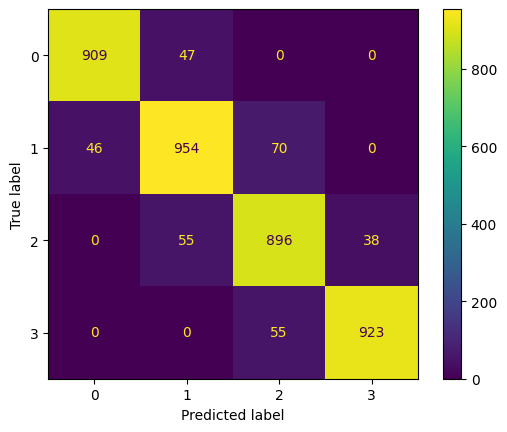

In [17]:
import matplotlib.pyplot as plt
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
plt.figure(figsize = (9,9))
cm_display.plot()
plt.show()

In [18]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.9230934549550615

In [19]:
import joblib
joblib.dump(clf, 'svm_model.pkl')

['svm_model.pkl']